# Null Hypothesis (H0):
There is no significant relationship between the predictor variables (features) and the likelihood of a customer getting a credit card. Any observed relationship is due to chance.

#Alternative Hypothesis (H1):
There is a significant relationship between the predictor variables (features) and the likelihood of a customer getting a credit card. The features in the dataset can be used to predict credit card eligibility.

#Variables:
Independent Variables (Features):

GENDER
Car_Owner
Propert_Owner
CHILDREN
Annual_income
Type_Income
EDUCATION
Marital_status
Housing_type
Birthday_count
Employed_days
Mobile_phone
Work_Phone
Phone
EMAIL_ID
Type_Occupation
Family_Members
#Dependent Variable (Target):

Credit Card Eligibility (Binary: 1 for eligible, 0 for not eligible)
Evaluation Metrics:
Since it's a binary classification problem (predicting credit card eligibility), We can use metrics such as:
Accuracy
Precision
Recall

# Steps followed-->
#load data
#treat missing value
#label encoding
#outlier
#scaling and standard
#model work

In [1]:
import pandas as pd
import numpy as np
df1= pd.read_csv("/content/drive/MyDrive/ML capstone 1/Credit_card.csv")
df2=pd.read_csv("/content/drive/MyDrive/ML capstone 1/Credit_card_label.csv")
credit=df1.merge(df2, how='right')
credit.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [2]:
credit.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [3]:
#filling Null Values
credit = credit.fillna(credit.median())
credit["GENDER"] = credit["GENDER"].fillna('F')
credit['Type_Occupation']=credit['Type_Occupation'].fillna('No Data')

<ipython-input-3-4aa10094743c>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  credit = credit.fillna(credit.median())


In [ ]:
credit.isnull().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64

<Axes: >

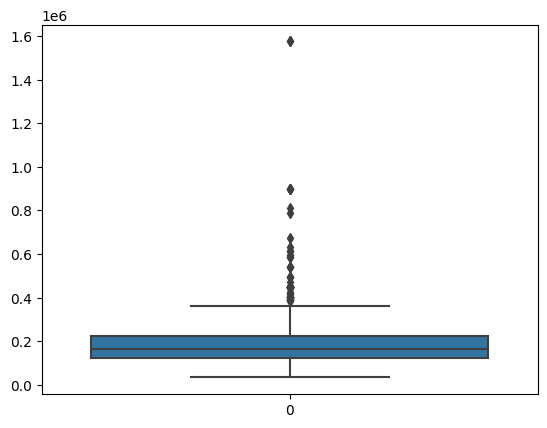

In [4]:
#Outlier Treatment
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
sns.boxplot(credit['Annual_income'])



<Axes: >

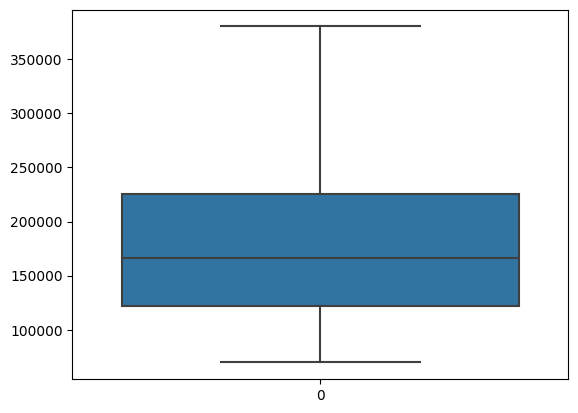

In [5]:
Q3 = credit['Annual_income'].quantile([.75]).values[0]
Q1  = credit['Annual_income'].quantile([.25]).values[0]
IQR = Q3-Q1
UB=Q3+1.5*IQR
LB=Q3-1.5*IQR
credit['Annual_income']=np.where(credit['Annual_income']>UB,UB,credit['Annual_income'])
credit['Annual_income']=np.where(credit['Annual_income']<LB,LB,credit['Annual_income'])
sns.boxplot(credit['Annual_income'])

<Axes: >

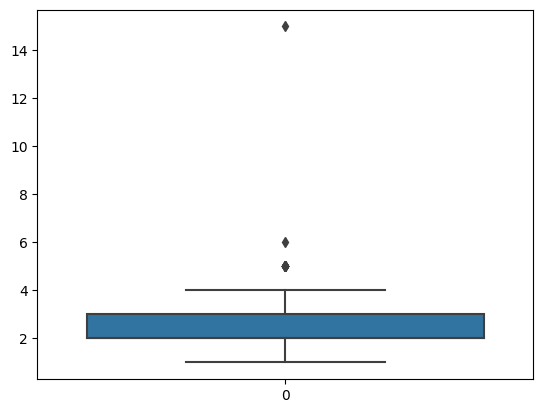

In [ ]:
sns.boxplot(credit['Family_Members'])

<Axes: >

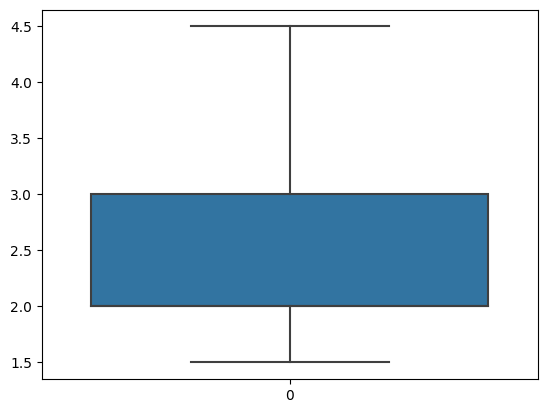

In [6]:
Q3 = credit['Family_Members'].quantile([.75]).values[0]
Q1  = credit['Family_Members'].quantile([.25]).values[0]
IQR = Q3-Q1
UB=Q3+1.5*IQR
LB=Q3-1.5*IQR
credit['Family_Members']=np.where(credit['Family_Members']>UB,UB,credit['Family_Members'])
credit['Family_Members']=np.where(credit['Family_Members']<LB,LB,credit['Family_Members'])
sns.boxplot(credit['Family_Members'])

In [ ]:
credit.head(10)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,No Data,2.0,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,No Data,2.0,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-15661.5,-586,1,1,1,0,No Data,2.0,1
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,No Data,2.0,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,No Data,2.0,1
5,5009753,F,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,No Data,2.0,1
6,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,No Data,2.0,1
7,5009894,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22134.0,365243,1,0,0,0,No Data,2.0,1
8,5010864,M,Y,Y,1,380250.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3.0,1
9,5010868,M,Y,Y,1,380250.0,Pensioner,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3.0,1


In [7]:
#Label-Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
credit['EDUCATION'] = label_encoder.fit_transform(credit['EDUCATION']) #Label encoding as it is showing some order in education level


In [ ]:
credit.shape

(1548, 19)

In [ ]:
credit.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

In [8]:
credit = pd.get_dummies(credit, columns=['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'Marital_status','Housing_type','Type_Occupation'], drop_first=True)
#one hot encoding as these columns is not having any ordinal values

In [ ]:
credit.shape

(1548, 45)

In [ ]:
credit.columns

Index(['Ind_ID', 'CHILDREN', 'Annual_income', 'EDUCATION', 'Birthday_count',
       'Employed_days', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID',
       'Family_Members', 'label', 'GENDER_M', 'Car_Owner_Y', 'Propert_Owner_Y',
       'Type_Income_Pensioner', 'Type_Income_State servant',
       'Type_Income_Working', 'Marital_status_Married',
       'Marital_status_Separated', 'Marital_status_Single / not married',
       'Marital_status_Widow', 'Housing_type_House / apartment',
       'Housing_type_Municipal apartment', 'Housing_type_Office apartment',
       'Housing_type_Rented apartment', 'Housing_type_With parents',
       'Type_Occupation_Cleaning staff', 'Type_Occupation_Cooking staff',
       'Type_Occupation_Core staff', 'Type_Occupation_Drivers',
       'Type_Occupation_HR staff', 'Type_Occupation_High skill tech staff',
       'Type_Occupation_IT staff', 'Type_Occupation_Laborers',
       'Type_Occupation_Low-skill Laborers', 'Type_Occupation_Managers',
       'Type_Occu

In [ ]:
credit.corr()

,Ind_ID,CHILDREN,Annual_income,EDUCATION,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,...,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_No Data,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
Ind_ID,1.000000,0.032535,-0.000252,0.020761,0.022750,-0.055396,NaN,0.085794,0.008403,-0.037923,...,-0.001929,0.006502,0.044050,-0.069949,0.066078,0.018468,0.006714,0.023849,0.064955,0.035227
CHILDREN,0.032535,1.000000,0.062976,-0.065007,0.277944,-0.219095,NaN,0.035014,-0.004908,0.025776,...,-0.007826,0.052493,0.029932,-0.151212,0.031794,0.027202,0.017414,0.014061,-0.002111,-0.015601
Annual_income,-0.000252,0.062976,1.000000,-0.258522,0.107270,-0.190575,NaN,-0.066252,0.008223,0.139004,...,-0.049664,0.256802,-0.056440,-0.136691,0.017198,0.007910,-0.025436,-0.020636,-0.049901,-0.042999
EDUCATION,0.020761,-0.065007,-0.258522,1.000000,-0.189385,0.128430,NaN,-0.012798,-0.027458,-0.125262,...,0.052873,-0.230570,0.031461,0.034959,0.031479,0.024868,0.027963,-0.010149,0.012560,-0.011308
Birthday_count,0.022750,0.277944,0.107270,-0.189385,1.000000,-0.614271,NaN,0.173290,-0.028548,0.166208,...,0.001981,0.103400,-0.015216,-0.407974,0.027483,0.041560,0.141982,0.002523,-0.042292,0.041076
Employed_days,-0.055396,-0.219095,-0.190575,0.128430,-0.614271,1.000000,NaN,-0.231184,-0.003403,-0.118268,...,-0.034020,-0.139870,-0.085226,0.663814,-0.047977,-0.016329,-0.129966,-0.034856,-0.056413,-0.025315
Mobile_phone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Work_Phone,0.085794,0.035014,-0.066252,-0.012798,0.173290,-0.231184,NaN,1.000000,0.352439,-0.009594,...,0.044546,0.032106,-0.003606,-0.142193,0.007083,0.025875,0.003678,0.002678,-0.015155,-0.001123
Phone,0.008403,-0.004908,0.008223,-0.027458,-0.028548,-0.003403,NaN,0.352439,1.000000,0.018105,...,0.003954,-0.015218,0.027890,0.018039,0.023327,0.014828,-0.009080,0.003954,-0.052503,-0.038105
EMAIL_ID,-0.037923,0.025776,0.139004,-0.125262,0.166208,-0.118268,NaN,-0.009594,0.018105,1.000000,...,-0.024397,0.003442,0.017429,-0.086817,0.009196,0.050633,0.064003,0.034292,-0.040874,0.021158


In [9]:
credit_df=credit[[ 'Annual_income', 'EDUCATION',
       'Family_Members', 'label', 'GENDER_M', 'Car_Owner_Y', 'Propert_Owner_Y',
       'Type_Income_Pensioner', 'Type_Income_State servant',
       'Type_Income_Working', 'Marital_status_Married',
       'Marital_status_Separated', 'Marital_status_Single / not married',
       'Marital_status_Widow', 'Housing_type_House / apartment',
       'Housing_type_Municipal apartment', 'Housing_type_Office apartment',
       'Housing_type_Rented apartment', 'Housing_type_With parents',
       'Type_Occupation_Cleaning staff', 'Type_Occupation_Cooking staff',
       'Type_Occupation_Core staff', 'Type_Occupation_Drivers',
       'Type_Occupation_HR staff', 'Type_Occupation_High skill tech staff',
       'Type_Occupation_IT staff', 'Type_Occupation_Laborers',
       'Type_Occupation_Low-skill Laborers', 'Type_Occupation_Managers',
       'Type_Occupation_Medicine staff', 'Type_Occupation_No Data',
       'Type_Occupation_Private service staff',
       'Type_Occupation_Realty agents', 'Type_Occupation_Sales staff',
       'Type_Occupation_Secretaries', 'Type_Occupation_Security staff',
       'Type_Occupation_Waiters/barmen staff']]
credit_df

,Annual_income,EDUCATION,Family_Members,label,GENDER_M,Car_Owner_Y,Propert_Owner_Y,Type_Income_Pensioner,Type_Income_State servant,Type_Income_Working,...,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_No Data,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
0,180000.0,1,2.0,1,1,1,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,315000.0,1,2.0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,315000.0,1,2.0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,166500.0,1,2.0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,315000.0,1,2.0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,166500.0,1,2.0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1544,225000.0,2,1.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1545,180000.0,1,4.0,0,1,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1546,270000.0,4,2.0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='Annual_income', ylabel='Count'>

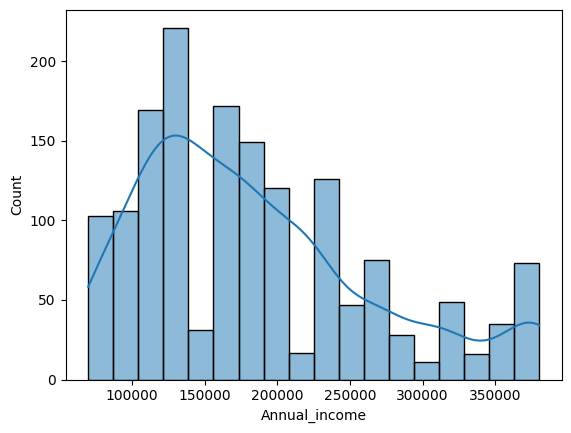

In [ ]:
#Skewness Check
import seaborn as sns
sns.histplot(data = credit_df['Annual_income'], kde = True)

<ipython-input-10-8be45491580d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_df["Annual_income"]=np.sqrt(credit_df["Annual_income"])


<Axes: xlabel='Annual_income', ylabel='Count'>

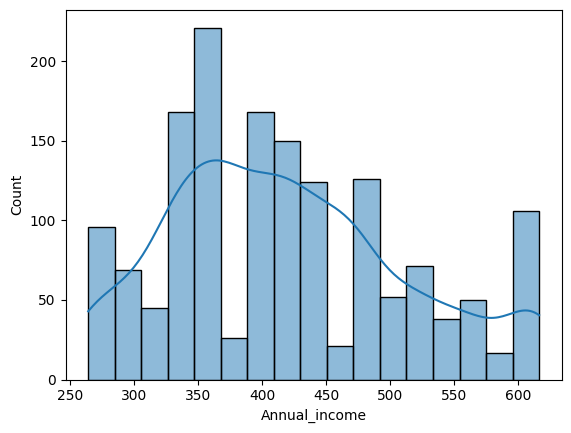

In [10]:
credit_df["Annual_income"]=np.sqrt(credit_df["Annual_income"])
sns.histplot(credit_df["Annual_income"],kde=True)

# Model buliding

# Splitting Data

In [11]:
X=credit_df[[ 'Annual_income', 'EDUCATION','Family_Members', 'GENDER_M', 'Car_Owner_Y', 'Propert_Owner_Y',
       'Type_Income_Pensioner', 'Type_Income_State servant',
       'Type_Income_Working', 'Marital_status_Married',
       'Marital_status_Separated', 'Marital_status_Single / not married',
       'Marital_status_Widow', 'Housing_type_House / apartment',
       'Housing_type_Municipal apartment', 'Housing_type_Office apartment',
       'Housing_type_Rented apartment', 'Housing_type_With parents',
       'Type_Occupation_Cleaning staff', 'Type_Occupation_Cooking staff',
       'Type_Occupation_Core staff', 'Type_Occupation_Drivers',
       'Type_Occupation_HR staff', 'Type_Occupation_High skill tech staff',
       'Type_Occupation_IT staff', 'Type_Occupation_Laborers',
       'Type_Occupation_Low-skill Laborers', 'Type_Occupation_Managers',
       'Type_Occupation_Medicine staff', 'Type_Occupation_No Data',
       'Type_Occupation_Private service staff',
       'Type_Occupation_Realty agents', 'Type_Occupation_Sales staff',
       'Type_Occupation_Secretaries', 'Type_Occupation_Security staff',
       'Type_Occupation_Waiters/barmen staff']]
Y=credit_df['label']

In [ ]:
X

,Annual_income,EDUCATION,Family_Members,GENDER_M,Car_Owner_Y,Propert_Owner_Y,Type_Income_Pensioner,Type_Income_State servant,Type_Income_Working,Marital_status_Married,...,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_No Data,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
0,12.100712,1,2.0,1,1,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,12.660328,1,2.0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,12.660328,1,2.0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,12.022751,1,2.0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,12.660328,1,2.0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,12.022751,1,2.0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1544,12.323856,2,1.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1545,12.100712,1,4.0,1,1,1,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
1546,12.506177,4,2.0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
from sklearn.model_selection import train_test_split # importing train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [ ]:
X_train

,Annual_income,EDUCATION,Family_Members,GENDER_M,Car_Owner_Y,Propert_Owner_Y,Type_Income_Pensioner,Type_Income_State servant,Type_Income_Working,Marital_status_Married,...,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_No Data,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
680,3.495496,4,1.5,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1079,3.459361,4,3.0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1190,3.584492,4,3.0,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
864,3.478608,4,1.5,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
743,3.437009,4,2.0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,3.558135,1,2.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1294,3.495496,4,3.0,1,1,1,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
860,3.410382,4,4.0,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1459,3.471227,1,2.0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#Scaling Data
from sklearn.preprocessing import StandardScaler # performing standardization technique
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_train

array([[ 0.29803958,  0.69886122, -1.01357283, ..., -0.07540845,
        -0.12146645, -0.06368006],
       [-0.27155611,  0.69886122,  0.97817823, ..., -0.07540845,
        -0.12146645, -0.06368006],
       [ 2.08435126,  0.69886122,  0.97817823, ..., -0.07540845,
        -0.12146645, -0.06368006],
       ...,
       [-0.93028504,  0.69886122,  2.30601227, ..., -0.07540845,
        -0.12146645, -0.06368006],
       [-0.09298549, -1.51390143, -0.34965581, ..., -0.07540845,
        -0.12146645, -0.06368006],
       [-0.93028504, -1.51390143, -0.34965581, ..., -0.07540845,
        -0.12146645, -0.06368006]])

In [23]:
X_test=sc.transform(X_test)
X_test

array([[-1.30985822, -0.03872633, -0.34965581, ..., -0.07540845,
        -0.12146645, -0.06368006],
       [-1.69465762,  0.69886122, -1.01357283, ..., -0.07540845,
        -0.12146645, -0.06368006],
       [-1.47488225, -0.03872633,  0.97817823, ..., -0.07540845,
        -0.12146645, -0.06368006],
       ...,
       [ 0.55896547,  0.69886122, -1.01357283, ..., -0.07540845,
        -0.12146645, -0.06368006],
       [-0.27155611,  0.69886122,  0.97817823, ..., -0.07540845,
        -0.12146645, -0.06368006],
       [-0.27155611,  0.69886122, -0.34965581, ..., -0.07540845,
        -0.12146645, -0.06368006]])

# Evaluation Metrics:

#Classification: Accuracy, Precision, Recall, F1-Score, ROC-AUC, Confusion Matrix, etc.
#Regression: Mean Absolute Error (MAE), Mean Squared Error (MSE), R-squared (R2), Root Mean Squared Error (RMSE), etc.

# Logistic Regression

In [32]:


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix

lm = LogisticRegression()
lm.fit(X_train,y_train)
# regression coefficients
y_pred = lm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Coefficients:", lm.coef_)
print("Intercept:", lm.intercept_)

print(accuracy)
print(precision)
print(recall)

confusion = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

Coefficients: [[-2.16021192e-04 -1.32344440e-01 -1.39492834e-01  4.45727750e-01
   8.19060640e-02 -2.38881125e-02  6.02366827e-01 -1.09840235e+00
  -3.77582433e-01  1.14061137e-01  3.16074343e-01  3.97265204e-02
   5.10325658e-03 -5.65321264e-01  7.75026733e-01 -5.25975702e-02
  -3.31602614e-02 -7.30921378e-01 -1.10597859e-01  4.33291425e-01
   3.22879996e-01 -3.04421685e-01 -7.79376452e-02 -1.36667156e-01
   4.45142797e-01 -1.94364797e-01  9.60504679e-02 -4.14134620e-01
  -1.64328988e-01 -6.98877878e-01 -3.33904653e-01 -2.19257021e-02
  -3.71923742e-01 -1.57434837e-01  8.90173765e-01  8.56380333e-02]]
Intercept: [-0.62557164]
0.9064516129032258
1.0
0.03333333333333333
Confusion Matrix:
[[280   0]
 [ 29   1]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, log_loss
model = DecisionTreeClassifier()

model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Log Loss:", logloss)

confusion = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.8580645161290322
Precision: 0.3055555555555556
Recall: 0.36666666666666664
Log Loss: 5.115873384261789
Confusion Matrix:
[[255  25]
 [ 19  11]]


In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier()

# Perform K-fold cross-validation (e.g., with K=5)
cv_scores = cross_val_score(model, X, Y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

# Fit the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Calculate and print the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)


Cross-validation scores: [0.82903226 0.82580645 0.79677419 0.79935275 0.81877023]
Mean CV accuracy: 0.813947176114417
Accuracy: 0.8354838709677419
Precision: 0.2558139534883721
Recall: 0.36666666666666664
Confusion Matrix:
[[248  32]
 [ 19  11]]


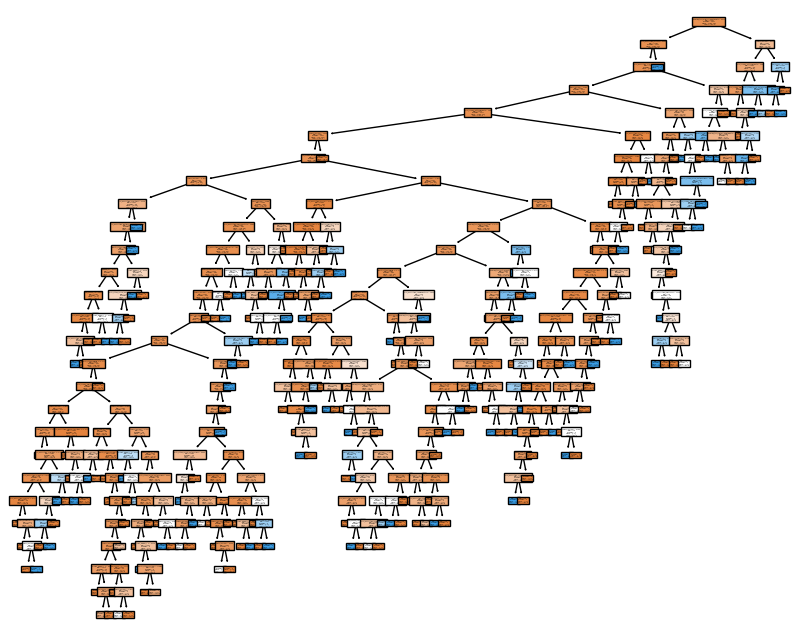

In [27]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Create the Decision Tree model
model = DecisionTreeClassifier()

# Fit the model to your data
model.fit(X_train, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(10, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=["Class 0", "Class 1"])
plt.show()


# Random Forest Classfier

In [35]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(accuracy)
print(precision)
print(recall)

confusion = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

0.9193548387096774
0.7777777777777778
0.23333333333333334
Confusion Matrix:
[[278   2]
 [ 23   7]]


# KNN With 3 fold cross validation

In [36]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score



# Create a K-Nearest Neighbors classifier with 3 neighbors
KNN = KNeighborsClassifier(n_neighbors=3)

k = 3
KF = KFold(n_splits=k, shuffle=True)
cv_score_train = []
cv_score_test = []

for train_index, test_index in KF.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Fit the model with the training set
    KNN.fit(X_train, y_train)

    # Evaluate the model on the training set
    train_score = KNN.score(X_train, y_train)
    cv_score_train.append(train_score)

    # Make predictions on the test set
    y_pred = KNN.predict(X_test)

    # Calculate accuracy on the test set
    test_accuracy = accuracy_score(y_test, y_pred)
    cv_score_test.append(test_accuracy)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(accuracy)
print(precision)
print(recall)
print("Training Set Scores:", cv_score_train)
print("Testing Set Scores:", cv_score_test)

0.8468992248062015
0.27906976744186046
0.2
Training Set Scores: [0.9011627906976745, 0.9050387596899225, 0.9156976744186046]
Testing Set Scores: [0.8488372093023255, 0.8236434108527132, 0.8468992248062015]


# XGBCLssifier

In [37]:
from xgboost import XGBClassifier

t1_model=XGBClassifier()

t1_model.fit(X_train,y_train)
y_pred=t1_model.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


print(accuracy)
print(precision)
print(recall)

confusion = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

Mean Squared Error: 0.14534883720930233
0.8546511627906976
0.2857142857142857
0.16666666666666666
Confusion Matrix:
[[431  25]
 [ 50  10]]


# SVM Classifier

In [38]:

from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV


svc_model=SVC()


svc_model.fit(X_train,y_train)
y_pred=svc_model.predict(X_test)


print(svc_model.score(X_train,y_train))
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


print(accuracy)
print(precision)
print(recall)

confusion = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

0.8885658914728682
Mean Squared Error: 0.11627906976744186
0.8837209302325582
0.0
0.0
Confusion Matrix:
[[456   0]
 [ 60   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
param_grid = {
    'C':  [0.1,1,2],        # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    }
# model1 - SVC(C=0.1, Kernel ='linear')
# model2 - SVC(C=1, kernel = 'rbf)....
# Create a GridSearchCV object to find the best hyperparameters
grid_search = GridSearchCV(svc_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train,y_train)
grid_search.best_estimator_

SVC(C=0.1, kernel='linear')

In [39]:
#SVC with hyper parameter tuning
svc_model_hp = SVC(C=0.1, kernel='linear')
svc_model_hp.fit(X_train,y_train)
svc_model_hp.score(X_train,y_train)

print(svc_model_hp.score(X_train,y_train))

0.8885658914728682
